# **Loading the Dataset**

In [1]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path1 = 'SJTU-AN21_training-set.csv'

# Read the CSV file
data1 = pd.read_csv(file_path1)

In [2]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path2 = 'SJTU-AN21_test-set.csv'

# Read the CSV file
data2 = pd.read_csv(file_path2)



In [3]:
import pandas as pd

# Concatenating data1 and data2 along rows
df = pd.concat([data1, data2], ignore_index=True)



# **Exploratory Data Analysis**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the shape of the dataset
print("\nShape of the dataset (rows, columns):")
df.shape


Shape of the dataset (rows, columns):


(36193, 85)

In [5]:
# Check for duplicate rows in the dataset
duplicates = df[df.duplicated()]

# Print the number of duplicate rows and the actual duplicates
print(f"Number of duplicate rows: {duplicates.shape[0]}")
print("Duplicate rows:")


Number of duplicate rows: 49
Duplicate rows:


In [6]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [7]:
# Check the correlation matrix for numerical columns
print("\nCorrelation matrix:")
correlation_matrix = numerical_df.corr()




Correlation matrix:


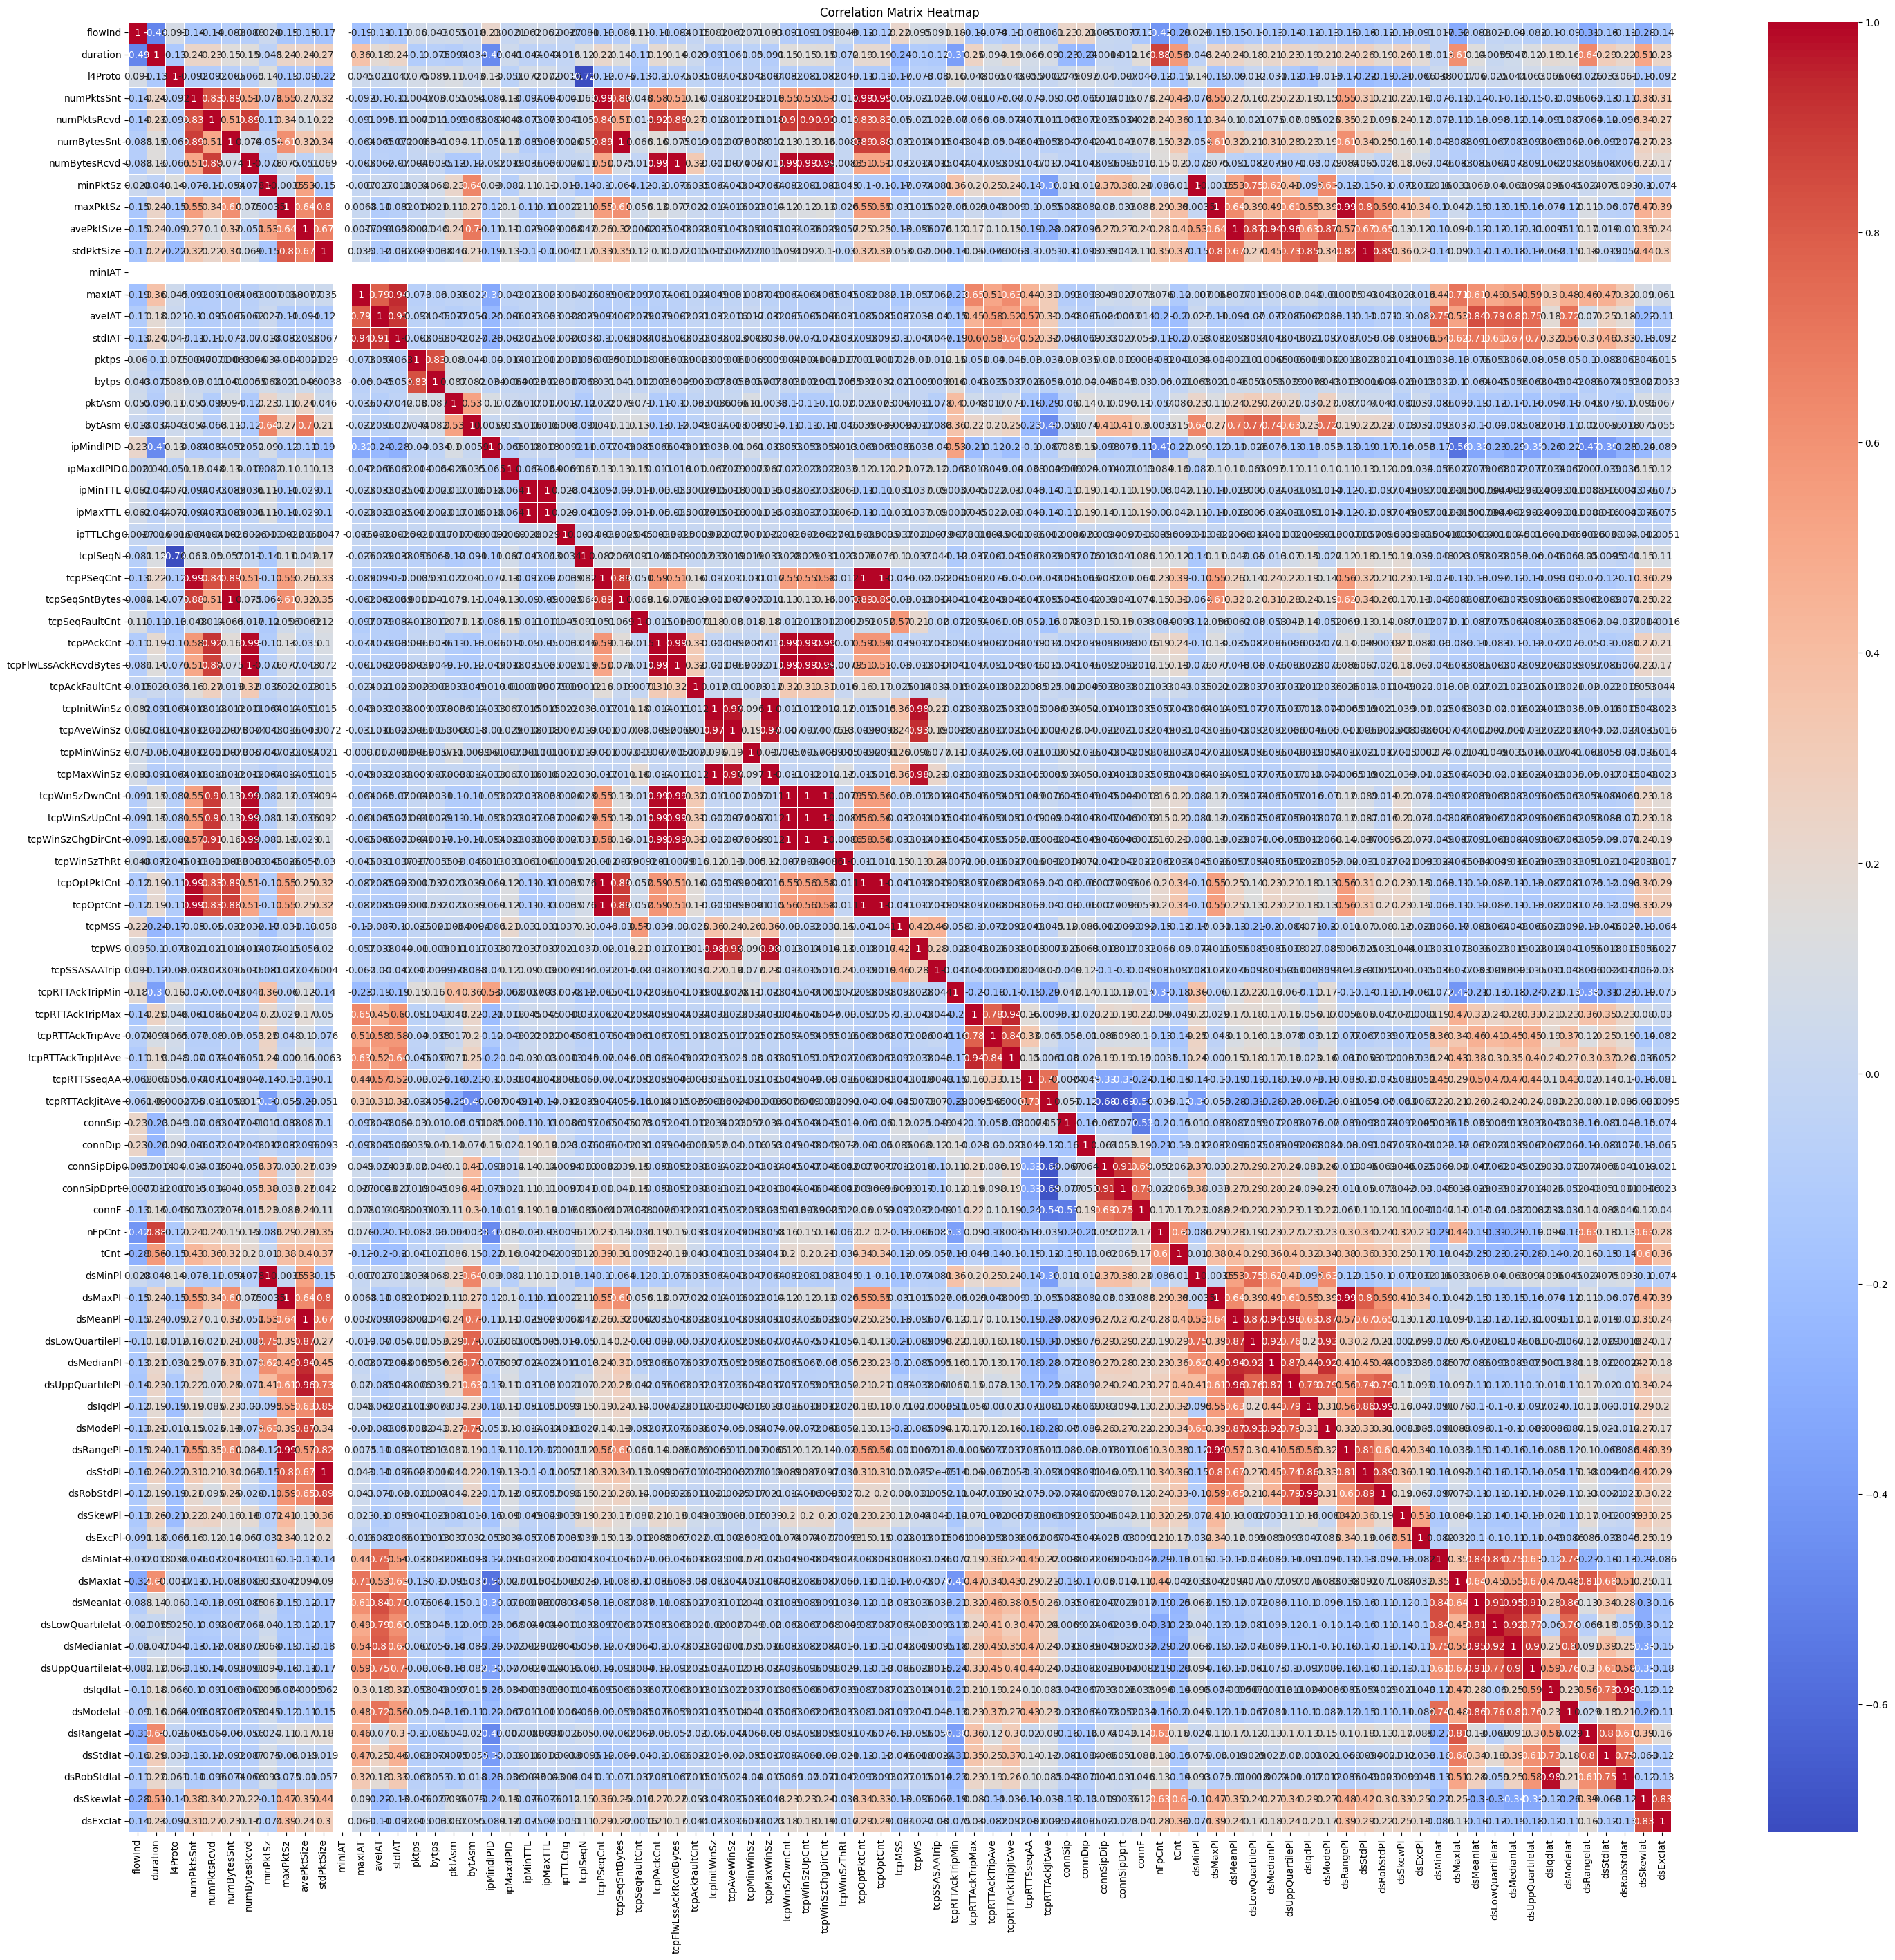

In [8]:
# Plot heatmap for the correlation matrix
plt.figure(figsize=(36, 34))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

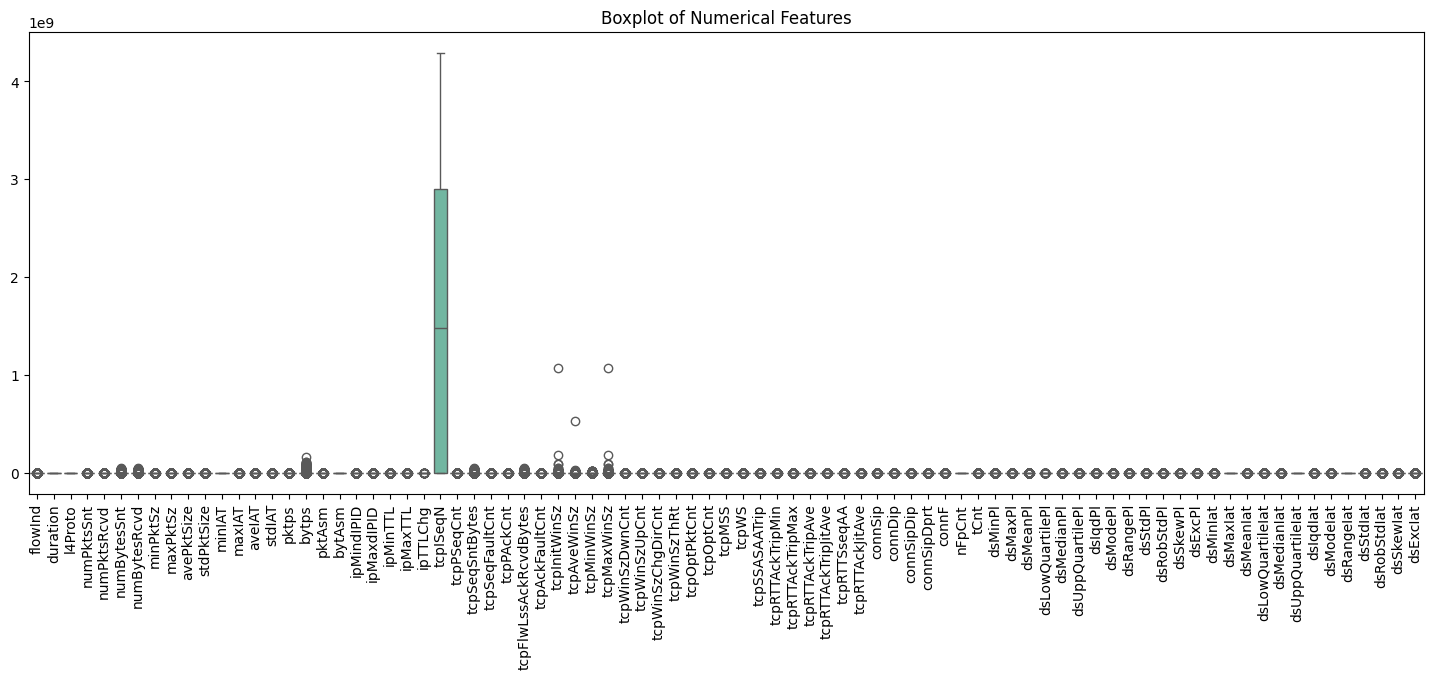

In [9]:
# Boxplot for detecting outliers in numerical columns
plt.figure(figsize=(18, 6))
sns.boxplot(data=df, palette='Set2')
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

C:\Users\jiasl\AppData\Local\Temp\ipykernel_29120\539165675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TrafficType', data=df, palette='Set3')


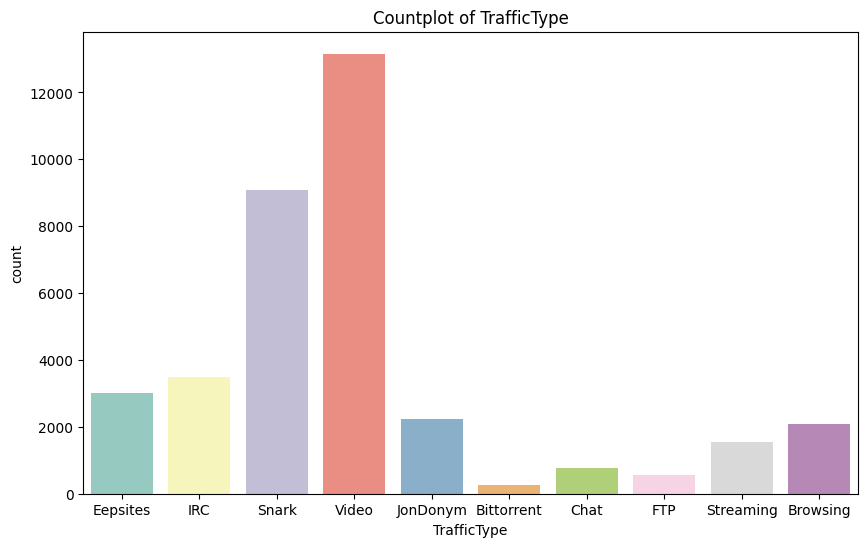

In [10]:
# Countplot for categorical columns (example with one column, replace 'TrafficType' with your column)
plt.figure(figsize=(10, 6))
sns.countplot(x='TrafficType', data=df, palette='Set3')
plt.title('Countplot of TrafficType')
plt.show()

# **Data Preprocessing**

In [11]:
# Remove duplicate rows
df_ = df.drop_duplicates()

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to remove outliers using IQR method
def remove_outliers_iqr(df_):
    # For each numerical column, calculate IQR and remove outliers
    for col in df_.select_dtypes(include=[np.number]).columns:
        Q1 = df_[col].quantile(0.25)
        Q3 = df_[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.25 * IQR
        upper_bound = Q3 + 0.70 * IQR

        # Filter the dataset to remove rows with outliers
        df_ = df_[(df_[col] >= lower_bound) & (df_[col] <= upper_bound)]

    return df_

# Cleaned dataset without outliers
df_ = remove_outliers_iqr(df_)

In [13]:
import pandas as pd

# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['%dir', 'TrafficType'], dtype='object')


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['%dir', 'TrafficType']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example DataFrame
data = {'TrafficType': ['Eepsites', 'IRC', 'Snark', 'Video', 'JonDonym', 'Bittorrent', 'Chat', 'FTP', 'Streaming', 'Browsing']}
data = pd.DataFrame(data)

# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(data['TrafficType'])

# Create a mapping of original values to encoded values
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Mapping of original values to encoded values for 'TrafficType':")
for original_value, encoded_value in mapping.items():
    print(f"{original_value}: {encoded_value}")

Mapping of original values to encoded values for 'TrafficType':
Bittorrent: 0
Browsing: 1
Chat: 2
Eepsites: 3
FTP: 4
IRC: 5
JonDonym: 6
Snark: 7
Streaming: 8
Video: 9


# **Data Balancing**

In [16]:
print(df['TrafficType'].value_counts())

TrafficType
9    13158
7     9068
5     3493
3     3022
6     2221
1     2088
8     1547
2      774
4      548
0      274
Name: count, dtype: int64


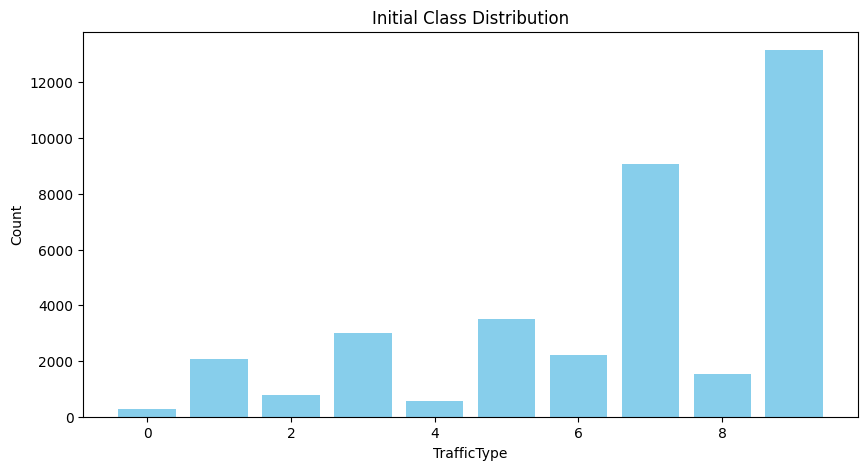

In [17]:
# Step 1: Plot the initial class distribution
def plot_class_distribution(counts, title):
    plt.figure(figsize=(10, 5))
    plt.bar(counts.index, counts.values, color='skyblue')
    plt.title(title)
    plt.xlabel('TrafficType')
    plt.ylabel('Count')
    plt.show()
# Assuming 'TrafficType' is your target column
plot_class_distribution(df['TrafficType'].value_counts(), 'Initial Class Distribution')


In [18]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import pandas as pd

# Assuming df is your dataset with 'TrafficType' as the target column
X = df.drop('TrafficType', axis=1)  # Features
y = df['TrafficType']  # Target

# 1. Downsampling
def downsample(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    print(f"Downsampled Class Distribution: {Counter(y_res)}")
    return X_res, y_res

# 2. Oversampling
def oversample(X, y):
    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X, y)
    print(f"Oversampled Class Distribution: {Counter(y_res)}")
    return X_res, y_res

# 3. Midpoint Sampling (combining upsampling and downsampling)
def calculate_midpoint(y):
    class_counts = Counter(y)
    min_class_size = min(class_counts.values())
    max_class_size = max(class_counts.values())
    midpoint_value = (min_class_size + max_class_size) // 2
    print(f"Midpoint Value for Resampling: {midpoint_value}")
    return midpoint_value

def midpoint_sample(X, y):
    class_counts = Counter(y)
    midpoint_value = calculate_midpoint(y)

    # Define strategies for upsampling and downsampling
    under_strategy = {cls: min(count, midpoint_value) for cls, count in class_counts.items() if count > midpoint_value}
    over_strategy = {cls: max(count, midpoint_value) for cls, count in class_counts.items() if count < midpoint_value}

    # Downsample majority classes to the midpoint value
    if under_strategy:
        rus = RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)
        X, y = rus.fit_resample(X, y)

    # Upsample minority classes to the midpoint value
    if over_strategy:
        ros = RandomOverSampler(sampling_strategy=over_strategy, random_state=42)
        X, y = ros.fit_resample(X, y)

    print(f"Midpoint Sampled Class Distribution: {Counter(y)}")
    return X, y

# Apply the methods:
X_downsampled, y_downsampled = downsample(X, y)
X_oversampled, y_oversampled = oversample(X, y)
X_mid_sampled, y_mid_sampled = midpoint_sample(X, y)  # Replacing SMOTEENN with midpoint sampling

# Combine X and y back into DataFrames
df_downsampled = pd.concat([X_downsampled, y_downsampled], axis=1)
df_oversampled = pd.concat([X_oversampled, y_oversampled], axis=1)
df_mid_sampled = pd.concat([X_mid_sampled, y_mid_sampled], axis=1)

# Save datasets as CSV files
df_downsampled.to_csv('downsampled_dataset.csv', index=False)
df_oversampled.to_csv('oversampled_dataset.csv', index=False)
df_mid_sampled.to_csv('mid_sampled_dataset.csv', index=False)  # Updated filename for midpoint sampling

print("Datasets saved successfully!")


Downsampled Class Distribution: Counter({0: 274, 1: 274, 2: 274, 3: 274, 4: 274, 5: 274, 6: 274, 7: 274, 8: 274, 9: 274})
Oversampled Class Distribution: Counter({3: 13158, 5: 13158, 7: 13158, 9: 13158, 6: 13158, 0: 13158, 2: 13158, 4: 13158, 8: 13158, 1: 13158})
Midpoint Value for Resampling: 6716
Midpoint Sampled Class Distribution: Counter({0: 6716, 1: 6716, 2: 6716, 3: 6716, 4: 6716, 5: 6716, 6: 6716, 7: 6716, 8: 6716, 9: 6716})
Datasets saved successfully!


In [19]:
print(df_downsampled['TrafficType'].value_counts())

TrafficType
0    274
1    274
2    274
3    274
4    274
5    274
6    274
7    274
8    274
9    274
Name: count, dtype: int64


In [20]:
print(df_oversampled['TrafficType'].value_counts())

TrafficType
3    13158
5    13158
7    13158
9    13158
6    13158
0    13158
2    13158
4    13158
8    13158
1    13158
Name: count, dtype: int64


In [21]:
print(df_mid_sampled['TrafficType'].value_counts())

TrafficType
0    6716
1    6716
2    6716
3    6716
4    6716
5    6716
6    6716
7    6716
8    6716
9    6716
Name: count, dtype: int64


# **Selection Of Dataset**

In [22]:
df=df_mid_sampled

# **Feature Selection**

# **Applying Maximum Voting Algorithm**

C:\Users\jiasl\AppData\Local\Temp\ipykernel_29120\2018969120.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')


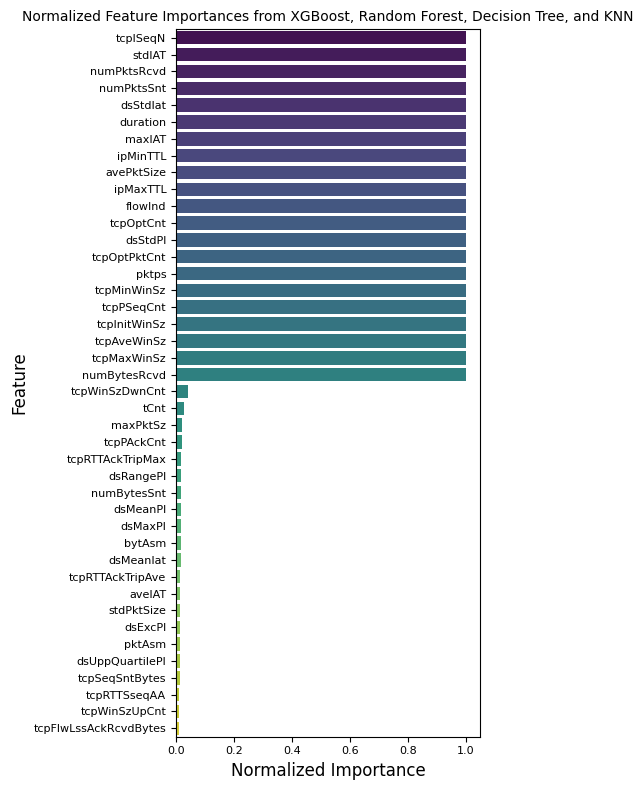

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataset with 'TrafficType' as the target column
X = df.drop('TrafficType', axis=1)
y = df['TrafficType']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
knn = KNeighborsClassifier()

# Fit the models
decision_tree.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

# KNN doesn't have feature importances, so we use variance threshold
selector = SelectFromModel(random_forest, threshold='median')
selector.fit(X_train_scaled, y_train)
knn_features = selector.get_support(indices=True)  # Selected features for KNN based on RandomForest selection

# Function to get feature importance scores from models
def get_feature_importance(model, method='importances'):
    if method == 'importances':
        return model.feature_importances_
    elif method == 'knn':
        # KNN doesn't have feature importance, we'll give equal importance to selected features
        importance_knn = np.zeros(X_train.shape[1])
        importance_knn[knn_features] = 1  # Assign 1 to the selected features
        return importance_knn
    else:
        raise ValueError("Invalid method specified")

# Extract feature importance from models
importance_dt = get_feature_importance(decision_tree, method='importances')
importance_rf = get_feature_importance(random_forest, method='importances')
importance_xgb = get_feature_importance(xgb, method='importances')
importance_knn = get_feature_importance(knn, method='knn')

# Aggregate feature importances using maximum voting (maximum across all models)
feature_importances = np.maximum.reduce([importance_dt, importance_rf, importance_xgb, importance_knn])

# Normalize feature importances to scale between 0 and 1
feature_importances_normalized = feature_importances / np.max(feature_importances)

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_normalized
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Select features with normalized importance greater than 0.60
selected_features = feature_importances_df[feature_importances_df['Importance'] > 0.60]['Feature']

# Plot the normalized feature importances
plt.figure(figsize=(5,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Normalized Feature Importances from XGBoost, Random Forest, Decision Tree, and KNN', fontsize=10)  # Adjust title font size
plt.xlabel('Normalized Importance', fontsize=12)  # Adjust x-axis label font size
plt.ylabel('Feature', fontsize=12)  # Adjust y-axis label font size
plt.xticks(fontsize=8)  # Adjust x-axis tick label font size
plt.yticks(fontsize=8)  # Adjust y-axis tick label font size
plt.tight_layout()  # Ensures proper spacing
plt.show()


In [24]:
selected_features.count()

42

In [25]:
# Use the selected features for your dataset
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [26]:
df = df[selected_features]
df['TrafficType'] = y

C:\Users\jiasl\AppData\Local\Temp\ipykernel_29120\2238143331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TrafficType'] = y


# **Applying Machine Learning Algorithms**

**1- Applying Random Forest Model**

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Features and target
X = df.drop(columns=['TrafficType'])
y = df['TrafficType']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Set up 10-fold cross-validation
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Lists to store scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform 10-fold cross-validation
for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the RandomForest model
    rf_clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_clf.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store metrics for each fold
    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print metrics for fold 10
    if fold_index == 10:
        print("\nFold 10 Results:")
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")

# Print overall average metrics across all folds
print("\nOverall 10-Fold Cross-Validation Results:")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Average Precision: {np.mean(precision_scores):.4f}")
print(f"Average Recall: {np.mean(recall_scores):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")




Fold 10 Results:
Accuracy: 0.9461
Precision: 0.9478
Recall: 0.9461
F1 Score: 0.9459

Overall 10-Fold Cross-Validation Results:
Average Accuracy: 0.9476
Average Precision: 0.9487
Average Recall: 0.9476
Average F1 Score: 0.9473


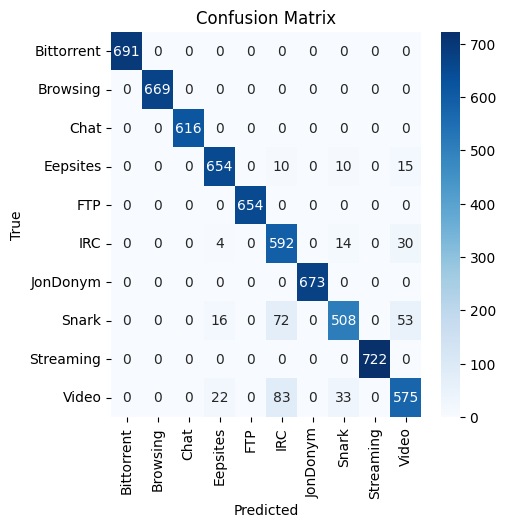

In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Class names (adjust based on your data)
class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

# Confusion Matrix function
def plot_confusion_matrix(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Usage example:
# Assuming y_test and y_pred are available from model predictions
plot_confusion_matrix(y_test, y_pred, class_names)


**2- Applying KNN Model**

In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, log_loss, classification_report, precision_score, recall_score, f1_score

# Assuming df is already defined
# Features and target
X = df.drop(columns=['TrafficType'])
y = df['TrafficType']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List to hold results for different fold counts
results = []

# Define a range of fold counts to test (up to 10)
folds_range = range(2, 11)  # Run up to 10 folds

# Loop over different fold counts
for n_folds in folds_range:
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Initialize KNeighborsClassifier (default 5 neighbors)
    knn_clf = KNeighborsClassifier()

    # Store accuracy, kappa, log loss, precision, recall, and F1-score for each fold
    knn_scores = []
    kappa_scores = []
    log_loss_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    print(f"\nEvaluating with {n_folds} folds:\n" + "=" * 40)

    # Define class names (modify according to your dataset)
    class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

    # Perform cross-validation manually
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train KNN model
        knn_clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = knn_clf.predict(X_test)
        y_pred_proba = knn_clf.predict_proba(X_test)  # For log loss calculation

        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        knn_scores.append(acc)

        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(y_test, y_pred)
        kappa_scores.append(kappa)

        # Calculate Logarithmic Loss
        loss = log_loss(y_test, y_pred_proba)
        log_loss_scores.append(loss)

        # Calculate precision, recall, and F1-score (weighted)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Print the evaluation report for fold 10 only
        if fold_index == 10:
            print(f"\nFold 10 Results:")
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(classification_report(y_test, y_pred, target_names=class_names))

    # Store the results for the current number of folds
    results.append({
        'n_folds': n_folds,
        'mean_accuracy': np.mean(knn_scores),
        'std_accuracy': np.std(knn_scores),
        'mean_kappa': np.mean(kappa_scores),
        'mean_log_loss': np.mean(log_loss_scores),
        'mean_precision': np.mean(precision_scores),
        'mean_recall': np.mean(recall_scores),
        'mean_f1_score': np.mean(f1_scores)
    })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results for each fold count
print("\nSummary of Results Across Fold Counts:")
print(results_df)

# Print overall average metrics for the best fold count based on mean accuracy
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

print("\nBest Performing Model Configuration Based on Mean Accuracy:")
print(f"Number of Folds: {best_result['n_folds']}")
print(f"Mean Accuracy: {best_result['mean_accuracy']}")
print(f"Standard Deviation of Accuracy: {best_result['std_accuracy']}")
print(f"Mean Kappa: {best_result['mean_kappa']}")
print(f"Mean Log Loss: {best_result['mean_log_loss']}")
print(f"Mean Precision: {best_result['mean_precision']}")
print(f"Mean Recall: {best_result['mean_recall']}")
print(f"Mean F1 Score: {best_result['mean_f1_score']}")



Evaluating with 2 folds:

Evaluating with 3 folds:

Evaluating with 4 folds:

Evaluating with 5 folds:

Evaluating with 6 folds:

Evaluating with 7 folds:

Evaluating with 8 folds:

Evaluating with 9 folds:

Evaluating with 10 folds:

Fold 10 Results:
Accuracy: 0.8641
Precision: 0.8650
Recall: 0.8641
F1 Score: 0.8622
              precision    recall  f1-score   support

  Bittorrent       1.00      1.00      1.00       691
    Browsing       0.97      0.95      0.96       669
        Chat       0.95      1.00      0.97       616
    Eepsites       0.74      0.82      0.78       689
         FTP       1.00      1.00      1.00       654
         IRC       0.61      0.73      0.66       640
    JonDonym       0.97      0.97      0.97       673
       Snark       0.75      0.62      0.68       649
   Streaming       0.92      0.97      0.95       722
       Video       0.74      0.59      0.65       713

    accuracy                           0.86      6716
   macro avg       0.86      0

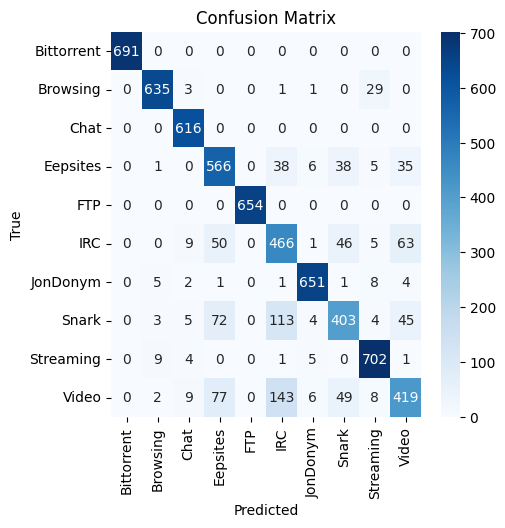

In [30]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Class names (adjust based on your data)
class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

# Confusion Matrix function
def plot_confusion_matrix(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Usage example:
# Assuming y_test and y_pred are available from KNN model predictions
plot_confusion_matrix(y_test, y_pred, class_names)


**3- Applying Hybrid Random Forest and KNN Model**

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score, log_loss, classification_report, precision_score, recall_score, f1_score

# Features and target
X = df.drop(columns=['TrafficType'])
y = df['TrafficType']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List to hold results for different fold counts
results = []

# Define a range of fold counts to test (up to 10)
folds_range = range(2, 11)  # Run up to 10 folds

# Loop over different fold counts
for n_folds in folds_range:
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Initialize RandomForest and KNeighbors classifiers
    rf_clf = RandomForestClassifier(random_state=42)
    knn_clf = KNeighborsClassifier()

    # Stacking Classifier (meta-classifier will be LogisticRegression)
    estimators = [('rf', rf_clf), ('knn', knn_clf)]
    hybrid_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

    # Store accuracy, kappa, log loss, precision, recall, and F1-score for each fold
    hybrid_scores = []
    kappa_scores = []
    log_loss_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    print(f"\nEvaluating with {n_folds} folds:\n" + "=" * 40)

    # Define class names
    class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

    # Perform cross-validation manually
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train hybrid model
        hybrid_model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = hybrid_model.predict(X_test)
        y_pred_proba = hybrid_model.predict_proba(X_test)  # For log loss calculation

        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        hybrid_scores.append(acc)

        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(y_test, y_pred)
        kappa_scores.append(kappa)

        # Calculate Logarithmic Loss
        loss = log_loss(y_test, y_pred_proba)
        log_loss_scores.append(loss)

        # Calculate precision, recall, and F1-score (weighted)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Print the evaluation report for fold 10 only
        if fold_index == 10:
            print(f"\nFold 10 Results:")
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(classification_report(y_test, y_pred, target_names=class_names))

    # Store the results for the current number of folds
    results.append({
        'n_folds': n_folds,
        'mean_accuracy': np.mean(hybrid_scores),
        'std_accuracy': np.std(hybrid_scores),
        'mean_kappa': np.mean(kappa_scores),
        'mean_log_loss': np.mean(log_loss_scores),
        'mean_precision': np.mean(precision_scores),
        'mean_recall': np.mean(recall_scores),
        'mean_f1_score': np.mean(f1_scores)
    })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results for each fold count
print("\nSummary of Results Across Fold Counts:")
print(results_df)

# Print overall average metrics for the best fold count based on mean accuracy
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

print("\nBest Performing Model Configuration Based on Mean Accuracy:")
print(f"Number of Folds: {best_result['n_folds']}")
print(f"Mean Accuracy: {best_result['mean_accuracy']}")
print(f"Standard Deviation of Accuracy: {best_result['std_accuracy']}")
print(f"Mean Kappa: {best_result['mean_kappa']}")
print(f"Mean Log Loss: {best_result['mean_log_loss']}")
print(f"Mean Precision: {best_result['mean_precision']}")
print(f"Mean Recall: {best_result['mean_recall']}")
print(f"Mean F1 Score: {best_result['mean_f1_score']}")




Evaluating with 2 folds:

Evaluating with 3 folds:

Evaluating with 4 folds:

Evaluating with 5 folds:

Evaluating with 6 folds:

Evaluating with 7 folds:

Evaluating with 8 folds:

Evaluating with 9 folds:

Evaluating with 10 folds:

Fold 10 Results:
Accuracy: 0.9525
Precision: 0.9528
Recall: 0.9525
F1 Score: 0.9526
              precision    recall  f1-score   support

  Bittorrent       1.00      1.00      1.00       691
    Browsing       1.00      1.00      1.00       669
        Chat       1.00      1.00      1.00       616
    Eepsites       0.97      0.94      0.95       689
         FTP       1.00      1.00      1.00       654
         IRC       0.87      0.91      0.89       640
    JonDonym       1.00      1.00      1.00       673
       Snark       0.86      0.83      0.85       649
   Streaming       1.00      1.00      1.00       722
       Video       0.83      0.84      0.84       713

    accuracy                           0.95      6716
   macro avg       0.95      0

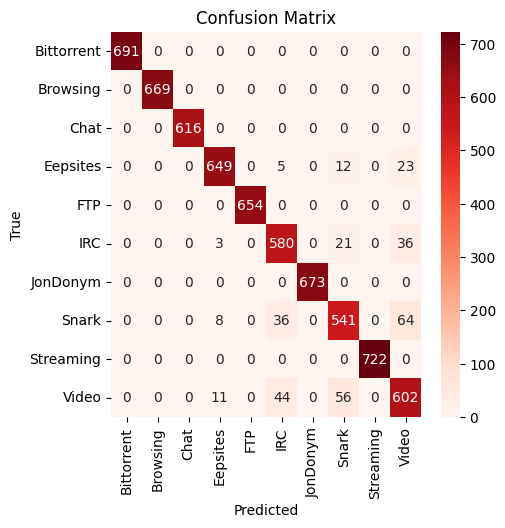

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Class names (adjust based on your data)
class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

# Confusion Matrix function
def plot_confusion_matrix(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Usage example:
# Assuming y_test and y_pred are available from hybrid model predictions
plot_confusion_matrix(y_test, y_pred, class_names)


# **Applying Deep Learning Models**

**1- Applying LSTM Model**

In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, log_loss, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Assuming df is already defined with features and labels
# Features and target
X = df.drop(columns=['TrafficType'])
y = df['TrafficType']

# Convert target to categorical (one-hot encoding)
y = to_categorical(y)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping X to fit the LSTM input [samples, timesteps, features]
# Since this is not sequence data, we'll treat each row as a single timestep
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# List to hold results for different fold counts
results = []

# Define a range of fold counts to test (up to 10)
folds_range = range(2, 6)  # Run up to 5 folds for the sake of training time

# Loop over different fold counts
for n_folds in folds_range:
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Store accuracy, kappa, log loss, precision, recall, and F1-score for each fold
    lstm_scores = []
    kappa_scores = []
    log_loss_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    print(f"\nEvaluating with {n_folds} folds:\n" + "=" * 40)

    # Define class names
    class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

    # Perform cross-validation manually
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build the LSTM model
        model = Sequential()
        model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(y_train.shape[1], activation='softmax'))  # Number of classes in the output layer

        # Compile the model
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the LSTM model
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

        # Predict on the test set
        y_pred_proba = model.predict(X_test)
        y_pred = np.argmax(y_pred_proba, axis=1)
        y_test_class = np.argmax(y_test, axis=1)

        # Calculate accuracy
        acc = accuracy_score(y_test_class, y_pred)
        lstm_scores.append(acc)

        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(y_test_class, y_pred)
        kappa_scores.append(kappa)

        # Calculate Logarithmic Loss
        loss = log_loss(y_test, y_pred_proba)
        log_loss_scores.append(loss)

        # Calculate precision, recall, and F1-score (weighted)
        precision = precision_score(y_test_class, y_pred, average='weighted')
        recall = recall_score(y_test_class, y_pred, average='weighted')
        f1 = f1_score(y_test_class, y_pred, average='weighted')
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Print the evaluation report for fold 10 only
        if fold_index == 10:
            print(f"\nFold 10 Results:")
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(classification_report(y_test_class, y_pred, target_names=class_names))

    # Store the results for the current number of folds
    results.append({
        'n_folds': n_folds,
        'mean_accuracy': np.mean(lstm_scores),
        'std_accuracy': np.std(lstm_scores),
        'mean_kappa': np.mean(kappa_scores),
        'mean_log_loss': np.mean(log_loss_scores),
        'mean_precision': np.mean(precision_scores),
        'mean_recall': np.mean(recall_scores),
        'mean_f1_score': np.mean(f1_scores)
    })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results for each fold count
print("\nSummary of Results Across Fold Counts:")
print(results_df)

# Print overall average metrics for the best fold count based on mean accuracy
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

print("\nBest Performing Model Configuration Based on Mean Accuracy:")
print(f"Number of Folds: {best_result['n_folds']}")
print(f"Mean Accuracy: {best_result['mean_accuracy']}")
print(f"Standard Deviation of Accuracy: {best_result['std_accuracy']}")
print(f"Mean Kappa: {best_result['mean_kappa']}")
print(f"Mean Log Loss: {best_result['mean_log_loss']}")
print(f"Mean Precision: {best_result['mean_precision']}")
print(f"Mean Recall: {best_result['mean_recall']}")
print(f"Mean F1 Score: {best_result['mean_f1_score']}")



Evaluating with 2 folds:


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5092 - loss: 1.4052
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6897 - loss: 0.7963
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7266 - loss: 0.6966
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7512 - loss: 0.6365
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7681 - loss: 0.5932
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7808 - loss: 0.5570
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7858 - loss: 0.5375
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7870 - loss: 0.5317
Epoch 9/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7938 - loss: 0.5086
Epoch 10/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7959 - loss: 0.5040
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4930 - loss: 1.4448
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6918 - loss: 0.8042
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7364 - loss: 0.6897
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7592 - loss: 0.6248
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7716 - loss: 0.5815
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7788 - loss: 0.5619
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7883 - loss: 0.5321
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7955 - loss: 0.5129
Epoch 9/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7996 - loss: 0.5056
Epoch 10/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8056 - loss: 0.4867
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Evaluating with 3 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5210 - loss: 1.3373
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7134 - loss: 0.7465
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7503 - loss: 0.6377
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7648 - loss: 0.6005
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7736 - loss: 0.5628
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7831 - loss: 0.5392
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7952 - loss: 0.5081
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8039 - loss: 0.4895
Epoch 9/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8043 - loss: 0.4834
Epoch 10/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8089 - loss: 0.4717
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5387 - loss: 1.3143
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7150 - loss: 0.7446
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7501 - loss: 0.6405
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7689 - loss: 0.5829
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7807 - loss: 0.5552
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7878 - loss: 0.5330
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7943 - loss: 0.5137
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7945 - loss: 0.5043
Epoch 9/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8075 - loss: 0.4797
Epoch 10/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8082 - loss: 0.4743
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5356 - loss: 1.3197
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7136 - loss: 0.7429
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7542 - loss: 0.6404
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7613 - loss: 0.5992
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7791 - loss: 0.5562
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7870 - loss: 0.5356
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7939 - loss: 0.5152
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7962 - loss: 0.5003
Epoch 9/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8054 - loss: 0.4807
Epoch 10/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8070 - loss: 0.4742
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Evaluating with 4 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5397 - loss: 1.2816
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7219 - loss: 0.7266
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7527 - loss: 0.6346
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7729 - loss: 0.5796
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7834 - loss: 0.5470
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7917 - loss: 0.5279
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7980 - loss: 0.5009
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8038 - loss: 0.4868
Epoch 9/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8086 - loss: 0.4716
Epoch 10/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8088 - loss: 0.4635
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5354 - loss: 1.3034
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7307 - loss: 0.7061
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7598 - loss: 0.6143
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7718 - loss: 0.5754
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7869 - loss: 0.5343
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7891 - loss: 0.5216
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8004 - loss: 0.4942
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8038 - loss: 0.4827
Epoch 9/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8087 - loss: 0.4718
Epoch 10/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8096 - loss: 0.4613
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5441 - loss: 1.2937
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7271 - loss: 0.7209
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7564 - loss: 0.6293
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7720 - loss: 0.5802
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7823 - loss: 0.5474
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7925 - loss: 0.5226
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7996 - loss: 0.5037
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8048 - loss: 0.4789
Epoch 9/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8123 - loss: 0.4629
Epoch 10/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8145 - loss: 0.4566
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5375 - loss: 1.2993
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7225 - loss: 0.7276
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7518 - loss: 0.6336
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7717 - loss: 0.5816
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7843 - loss: 0.5452
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7929 - loss: 0.5179
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7953 - loss: 0.5053
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8033 - loss: 0.4796
Epoch 9/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8094 - loss: 0.4700
Epoch 10/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8133 - loss: 0.4587
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Evaluating with 5 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5501 - loss: 1.2626
Epoch 2/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7249 - loss: 0.7165
Epoch 3/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7573 - loss: 0.6174
Epoch 4/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7765 - loss: 0.5652
Epoch 5/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7863 - loss: 0.5299
Epoch 6/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7958 - loss: 0.5055
Epoch 7/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8008 - loss: 0.4934
Epoch 8/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8079 - loss: 0.4725
Epoch 9/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8074 - loss: 0.4758
Epoch 10/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8144 - loss: 0.4541
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5393 - loss: 1.2776
Epoch 2/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7284 - loss: 0.7107
Epoch 3/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7573 - loss: 0.6207
Epoch 4/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7750 - loss: 0.5710
Epoch 5/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7873 - loss: 0.5414
Epoch 6/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7940 - loss: 0.5235
Epoch 7/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7998 - loss: 0.4965
Epoch 8/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8037 - loss: 0.4862
Epoch 9/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8079 - loss: 0.4709
Epoch 10/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8091 - loss: 0.4652
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5426 - loss: 1.2845
Epoch 2/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7225 - loss: 0.7283
Epoch 3/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7520 - loss: 0.6318
Epoch 4/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7743 - loss: 0.5761
Epoch 5/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7830 - loss: 0.5414
Epoch 6/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7940 - loss: 0.5108
Epoch 7/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8033 - loss: 0.4919
Epoch 8/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8050 - loss: 0.4748
Epoch 9/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8103 - loss: 0.4645
Epoch 10/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8164 - loss: 0.4469
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5471 - loss: 1.2777
Epoch 2/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7213 - loss: 0.7240
Epoch 3/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7585 - loss: 0.6178
Epoch 4/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7782 - loss: 0.5622
Epoch 5/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7871 - loss: 0.5334
Epoch 6/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7999 - loss: 0.5064
Epoch 7/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8048 - loss: 0.4893
Epoch 8/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8085 - loss: 0.4741
Epoch 9/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8127 - loss: 0.4629
Epoch 10/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8156 - loss: 0.4523
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5472 - loss: 1.2633
Epoch 2/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7248 - loss: 0.7144
Epoch 3/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7609 - loss: 0.6165
Epoch 4/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7800 - loss: 0.5628
Epoch 5/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7921 - loss: 0.5258
Epoch 6/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7977 - loss: 0.5058
Epoch 7/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8031 - loss: 0.4857
Epoch 8/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8060 - loss: 0.4753
Epoch 9/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8107 - loss: 0.4669
Epoch 10/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8142 - loss: 0.4591
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Summary of Results Across Fold Counts:
   n_folds  mean_accuracy  std_accuracy  mean_kap

C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


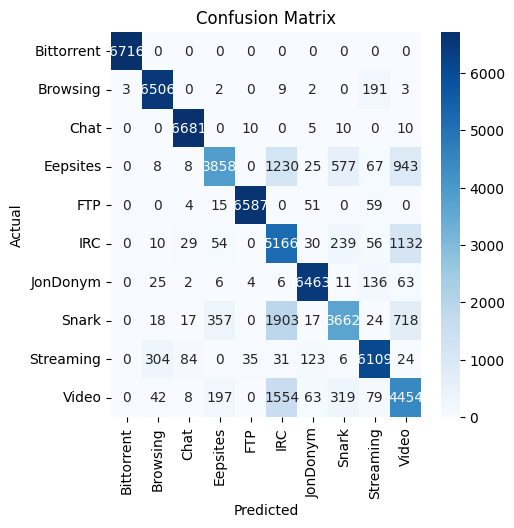

In [34]:
# After your imports and before plotting the confusion matrix

# Initialize lists to store true and predicted labels
y_true_all = []
y_pred_all = []

# Inside your KFold loop, after predicting
for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # (Your model building and training code here)

    # Predict on the test set
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_class = np.argmax(y_test, axis=1)

    # Append predictions and true labels for confusion matrix
    y_true_all.extend(y_test_class)  # Collecting true labels
    y_pred_all.extend(y_pred)         # Collecting predicted labels

# After the KFold loop

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names (update this according to your dataset)
class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


**2- Applying ANN Model**

In [35]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, log_loss, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Features and target
X = df.drop(columns=['TrafficType'])
y = df['TrafficType']

# Convert target to categorical (one-hot encoding)
y = to_categorical(y)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List to hold results for different fold counts
results = []

# Define a range of fold counts to test (up to 5 for training time)
folds_range = range(2, 6)  # Run up to 5 folds

# Loop over different fold counts
for n_folds in folds_range:
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Store accuracy, kappa, log loss, precision, recall, and F1-score for each fold
    ann_scores = []
    kappa_scores = []
    log_loss_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    print(f"\nEvaluating with {n_folds} folds:\n" + "=" * 40)

    # Define class names
    class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

    # Perform cross-validation manually
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build the ANN model
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer for multi-class classification

        # Compile the model
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the ANN model
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

        # Predict on the test set
        y_pred_proba = model.predict(X_test)
        y_pred = np.argmax(y_pred_proba, axis=1)
        y_test_class = np.argmax(y_test, axis=1)

        # Calculate accuracy
        acc = accuracy_score(y_test_class, y_pred)
        ann_scores.append(acc)

        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(y_test_class, y_pred)
        kappa_scores.append(kappa)

        # Calculate Logarithmic Loss
        loss = log_loss(y_test, y_pred_proba)
        log_loss_scores.append(loss)

        # Calculate precision, recall, and F1-score (weighted)
        precision = precision_score(y_test_class, y_pred, average='weighted')
        recall = recall_score(y_test_class, y_pred, average='weighted')
        f1 = f1_score(y_test_class, y_pred, average='weighted')
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Print the evaluation report for fold 10 only
        if fold_index == 10:
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(classification_report(y_test_class, y_pred, target_names=class_names))

    # Store the results for the current number of folds
    results.append({
        'n_folds': n_folds,
        'mean_accuracy': np.mean(ann_scores),
        'std_accuracy': np.std(ann_scores),
        'mean_kappa': np.mean(kappa_scores),
        'mean_log_loss': np.mean(log_loss_scores),
        'mean_precision': np.mean(precision_scores),
        'mean_recall': np.mean(recall_scores),
        'mean_f1_score': np.mean(f1_scores)
    })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results for each fold count
print("\nSummary of Results Across Fold Counts:")
print(results_df)

# Print overall average metrics for the best fold count based on mean accuracy
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

print("\nBest Performing Model Configuration Based on Mean Accuracy:")
print(f"Number of Folds: {best_result['n_folds']}")



Evaluating with 2 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4771 - loss: 1.4381
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6664 - loss: 0.8749
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7032 - loss: 0.7671
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7308 - loss: 0.6962
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7392 - loss: 0.6704
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7471 - loss: 0.6424
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7566 - loss: 0.6178
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7698 - loss: 0.5868
Epoch 9/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7652 - loss: 0.5925
Epoch 10/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7690 - loss: 0.5788
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4791 - loss: 1.4315
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6649 - loss: 0.8793
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7084 - loss: 0.7563
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7319 - loss: 0.6963
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7441 - loss: 0.6569
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7566 - loss: 0.6216
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7597 - loss: 0.6083
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7686 - loss: 0.5922
Epoch 9/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7790 - loss: 0.5710
Epoch 10/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7743 - loss: 0.5600
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step

Evaluating with 3 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5204 - loss: 1.3509
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6839 - loss: 0.8217
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7221 - loss: 0.7180
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7366 - loss: 0.6749
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7451 - loss: 0.6423
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7600 - loss: 0.6035
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7646 - loss: 0.5910
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7676 - loss: 0.5832
Epoch 9/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7765 - loss: 0.5552
Epoch 10/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7811 - loss: 0.5416
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5001 - loss: 1.3715
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6775 - loss: 0.8395
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7186 - loss: 0.7310
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7406 - loss: 0.6698
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7488 - loss: 0.6385
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7602 - loss: 0.6061
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7679 - loss: 0.5916
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7717 - loss: 0.5714
Epoch 9/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7780 - loss: 0.5595
Epoch 10/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7796 - loss: 0.5502
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4965 - loss: 1.3843
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6847 - loss: 0.8354
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7156 - loss: 0.7328
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7417 - loss: 0.6673
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7505 - loss: 0.6310
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7609 - loss: 0.6047
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7713 - loss: 0.5835
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7766 - loss: 0.5574
Epoch 9/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7737 - loss: 0.5601
Epoch 10/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7902 - loss: 0.5283
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step

Evaluating with 4 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5170 - loss: 1.3336
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6801 - loss: 0.8365
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7208 - loss: 0.7303
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7409 - loss: 0.6660
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7576 - loss: 0.6178
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7576 - loss: 0.6098
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7705 - loss: 0.5744
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7745 - loss: 0.5734
Epoch 9/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7792 - loss: 0.5526
Epoch 10/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7828 - loss: 0.5466
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5138 - loss: 1.3468
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6962 - loss: 0.8035
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7192 - loss: 0.7257
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7423 - loss: 0.6654
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7536 - loss: 0.6267
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7644 - loss: 0.5971
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7709 - loss: 0.5816
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7745 - loss: 0.5678
Epoch 9/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7815 - loss: 0.5513
Epoch 10/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7850 - loss: 0.5393
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5189 - loss: 1.3380
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6942 - loss: 0.8126
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7287 - loss: 0.7032
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7465 - loss: 0.6478
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7603 - loss: 0.6160
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7663 - loss: 0.5929
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7757 - loss: 0.5696
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7818 - loss: 0.5479
Epoch 9/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7845 - loss: 0.5391
Epoch 10/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7897 - loss: 0.5284
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5136 - loss: 1.3368
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6901 - loss: 0.8152
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7282 - loss: 0.7055
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7435 - loss: 0.6500
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7562 - loss: 0.6198
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7637 - loss: 0.5939
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7710 - loss: 0.5792
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7768 - loss: 0.5601
Epoch 9/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7782 - loss: 0.5481
Epoch 10/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7863 - loss: 0.5350
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Evaluating with 5 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5162 - loss: 1.3336
Epoch 2/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7041 - loss: 0.7867
Epoch 3/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7320 - loss: 0.6937
Epoch 4/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7510 - loss: 0.6434
Epoch 5/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7570 - loss: 0.6162
Epoch 6/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7646 - loss: 0.5918
Epoch 7/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7704 - loss: 0.5750
Epoch 8/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7795 - loss: 0.5514
Epoch 9/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7822 - loss: 0.5436
Epoch 10/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7825 - loss: 0.5373
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5288 - loss: 1.3175
Epoch 2/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6997 - loss: 0.7901
Epoch 3/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7313 - loss: 0.6900
Epoch 4/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7484 - loss: 0.6388
Epoch 5/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7612 - loss: 0.6026
Epoch 6/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7692 - loss: 0.5802
Epoch 7/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7791 - loss: 0.5536
Epoch 8/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7828 - loss: 0.5369
Epoch 9/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7872 - loss: 0.5254
Epoch 10/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7919 - loss: 0.5171
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5315 - loss: 1.3232
Epoch 2/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6965 - loss: 0.7948
Epoch 3/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7329 - loss: 0.6878
Epoch 4/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7520 - loss: 0.6358
Epoch 5/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7618 - loss: 0.6056
Epoch 6/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7702 - loss: 0.5778
Epoch 7/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7765 - loss: 0.5608
Epoch 8/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7802 - loss: 0.5471
Epoch 9/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7876 - loss: 0.5348
Epoch 10/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7888 - loss: 0.5271
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5323 - loss: 1.3032
Epoch 2/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7009 - loss: 0.7848
Epoch 3/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7384 - loss: 0.6738
Epoch 4/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7535 - loss: 0.6322
Epoch 5/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7640 - loss: 0.6026
Epoch 6/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7722 - loss: 0.5837
Epoch 7/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7733 - loss: 0.5773
Epoch 8/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7754 - loss: 0.5601
Epoch 9/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7848 - loss: 0.5382
Epoch 10/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7886 - loss: 0.5318
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5235 - loss: 1.3369
Epoch 2/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6952 - loss: 0.8013
Epoch 3/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7267 - loss: 0.7027
Epoch 4/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7496 - loss: 0.6425
Epoch 5/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7623 - loss: 0.6042
Epoch 6/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7677 - loss: 0.5872
Epoch 7/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7745 - loss: 0.5651
Epoch 8/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7810 - loss: 0.5478
Epoch 9/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7818 - loss: 0.5413
Epoch 10/10
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7893 - loss: 0.5223
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  

Summary of Results Across Fold Counts:
   n_folds  mean_accuracy  std_accuracy  mean_k

C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


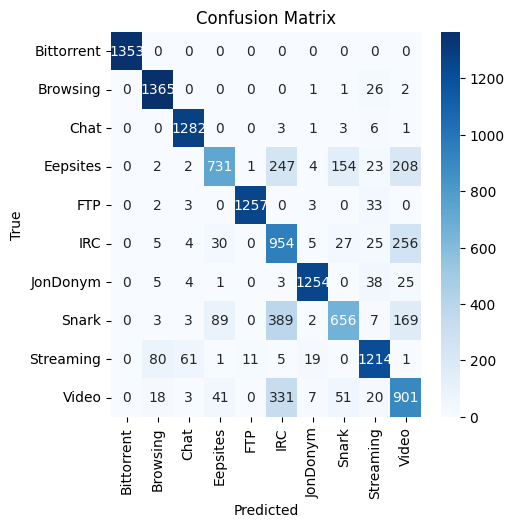

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have your kf and other setup ready...

# After the loop for cross-validation, you can create confusion matrices for each fold
for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    # ... (existing code) ...

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test_class, y_pred)

    # Check if the current fold is the 5th fold (index 4)
    if fold_index == 4:
        # Plot the confusion matrix
        plt.figure(figsize=(5,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f'Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
